In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(1)

In [ ]:
size = 10_000
x1 = np.random.uniform(0, 1, size)
x1 = np.asarray([x1]).T
y = 2*x1 + np.random.normal(0, x1) # true target generating function

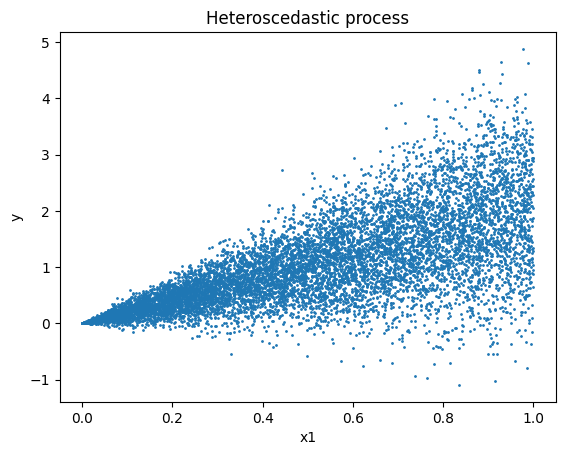

In [ ]:
plt.scatter(x1, y, s=1)
plt.ylabel('y')
plt.xlabel('x1')
plt.title('Heteroscedastic process')
plt.savefig("../_static/how-it-works-dle-data.svg", format="svg")

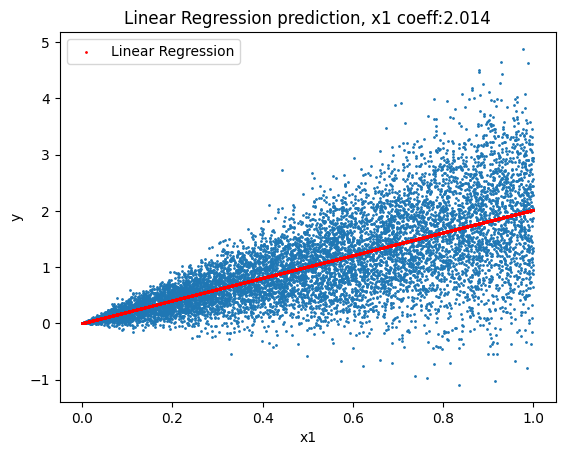

In [ ]:

child_model = LinearRegression()
child_model.fit(x1, y)
child_pred = child_model.predict(x1)
x1_coef = np.round(child_model.coef_[0][0], 3)

plt.scatter(x1, y, s=1)
plt.ylabel('y')
plt.xlabel('x1')
plt.title('Linear Regression prediction, x1 coeff:{}'.format(x1_coef))
plt.scatter(x1, child_pred, s=1, color='red', label='Linear Regression')
plt.legend()
plt.savefig("../_static/how-it-works-dle-regression.svg", format="svg")

In [ ]:
child_model.score(x1, y)

0.5008844408557486

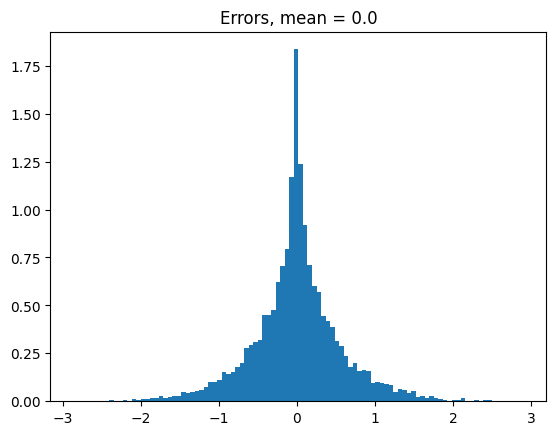

In [ ]:
errors = y - child_pred 
plt.hist(errors, bins=100, density=True);
mean_errors = np.mean(errors)
plt.title("Errors, mean = {}".format(np.round(mean_errors, 3)))
plt.savefig("../_static/how-it-works-dle-regression-errors-hist.svg", format="svg")

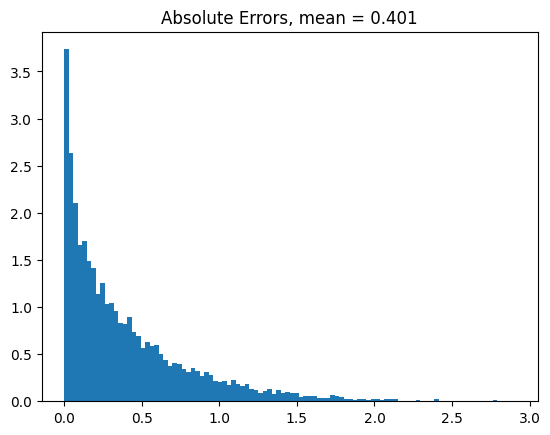

In [ ]:
abs_errors = abs(y - child_pred)
plt.hist(abs_errors, bins=100, density=True);
mean_errors = np.mean(abs_errors)
plt.title("Absolute Errors, mean = {}".format(np.round(mean_errors, 3)))
plt.savefig("../_static/how-it-works-dle-regression-abs-errors-hist.svg", format="svg")

In [ ]:
nanny_model_target = abs_errors
nanny_model = LinearRegression()
nanny_features = np.asarray([x1.T[0], child_pred.T[0]]).T
nanny_model.fit(nanny_features, nanny_model_target)
nanny_abs_error_estimate = nanny_model.predict(nanny_features)
prediction_interval_lower = child_pred - nanny_abs_error_estimate
prediction_interval_upper = child_pred + nanny_abs_error_estimate

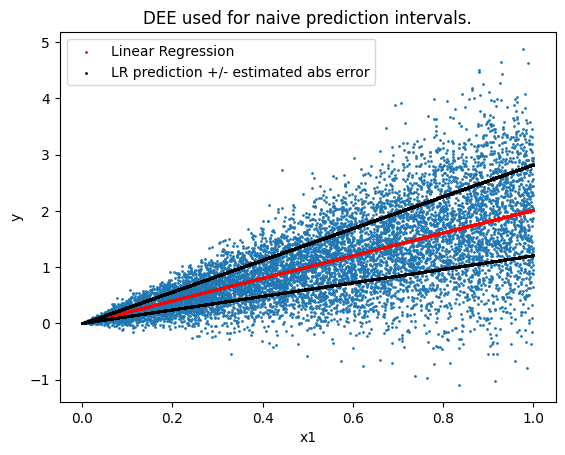

In [ ]:
plt.scatter(x1, y, s=1)
plt.scatter(x1, child_pred, s=1, color='red', label='Linear Regression')
plt.scatter(x1, prediction_interval_lower, s=1, color='black', label='LR prediction +/- estimated abs error')
plt.scatter(x1, prediction_interval_upper, s=1, color='black')
plt.ylabel('y')
plt.xlabel('x1')
plt.title('Linear Regression fit.')
plt.title("DEE used for naive prediction intervals.");
plt.legend();
plt.savefig("../_static/how-it-works-dle-regression-PI.svg", format="svg")

In [ ]:
# randomly select observations where x1 < 0.5
idx_x1_lt_05 = np.where(x1 < 0.5)[0]
random_indexes = np.random.choice(idx_x1_lt_05, 1000)

y_drawn = y[random_indexes]
child_pred_drawn = child_pred[random_indexes]
nanny_abs_error_estimate_drawn = nanny_abs_error_estimate[random_indexes]

# true MAE, estimated MAE
mean_absolute_error(y_drawn, child_pred_drawn), np.mean(nanny_abs_error_estimate_drawn)

(0.20111729723798066, 0.2031672932387649)

In [ ]:
# randomly select observations where x1 > 0.5
idx_x1_gt_05 = np.where(x1 > 0.5)[0]
random_indexes = np.random.choice(idx_x1_gt_05, 1000)

y_drawn = y[random_indexes]
child_pred_drawn = child_pred[random_indexes]
nanny_abs_error_estimate_drawn = nanny_abs_error_estimate[random_indexes]

# true MAE, estimated MAE
mean_absolute_error(y_drawn, child_pred_drawn), np.mean(nanny_abs_error_estimate_drawn)

(0.6101016454957128, 0.5992408384835519)